# **Machine Problem No. 2**
---


> Evaluating Machine Learning Model Performance Using Logistic Regression






In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,  accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# **1. Data Selection**

In [ ]:
#Load Dataset
df = pd.read_csv("StudentPerformance.csv")

# **2. Data Preparation**

In [ ]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.info()
print("-"*50)
print("Missing Values")
print(df.isnull().sum())
print("-"*50)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
--------------------------------------------------
Missing Values
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading sc

In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
numeric_cols = ["math score", "reading score", "writing score"]

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.390024,0.193999,0.391492,False,True,False,False,False,True,False,False,False,False,True,True
1,0.192076,1.427476,1.313269,False,False,True,False,False,False,False,False,True,False,True,False
2,1.577711,1.770109,1.642475,False,True,False,False,False,False,False,True,False,False,True,True
3,-1.259543,-0.833899,-1.583744,True,False,False,False,False,False,False,False,False,False,False,True
4,0.653954,0.605158,0.457333,True,False,True,False,False,False,False,False,True,False,True,True


# **3. Train-Test Split**

In [ ]:
# Target: test preparation course (completed vs none)
y = df["test preparation course"]

# Features: drop the target
X = df.drop(["test preparation course"], axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (800, 14)
Testing set size: (200, 14)


# **4. Model Building - Logistic Regression**

In [ ]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Train on the training set
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
train_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
test_accuracy = accuracy_score(y_test, log_reg.predict(X_test))

print("-" * 50)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


--------------------------------------------------
Training Accuracy: 0.7412
Testing Accuracy: 0.7600


# **5. Cross-Validation**

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring="accuracy")

for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print("-" * 50)
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Fold 1: 0.7450
Fold 2: 0.7700
Fold 3: 0.7050
Fold 4: 0.7050
Fold 5: 0.7250
--------------------------------------------------
Mean CV accuracy: 0.7300
Standard deviation: 0.0249


# **6. Model Evaluation - Confusion Matrix**

In [ ]:
# Predictions on the test set
y_pred = log_reg.predict(X_test)


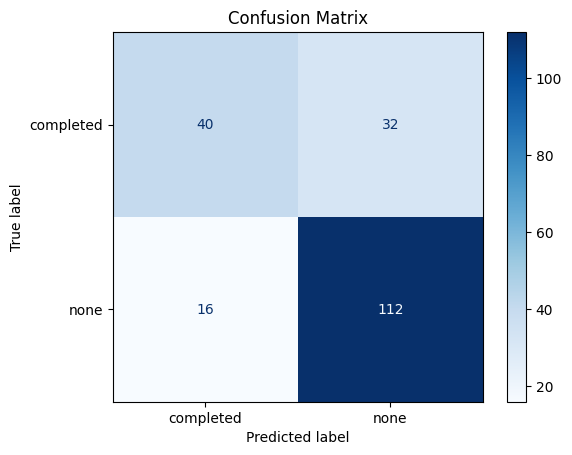

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 (binary classification: "completed" vs "none")
prec = precision_score(y_test, y_pred, pos_label="completed")
rec = recall_score(y_test, y_pred, pos_label="completed")
f1 = f1_score(y_test, y_pred, pos_label="completed")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print("-" * 50)

# Full classification report with 4 decimal places
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


Accuracy: 0.7600
Precision: 0.7143
Recall: 0.5556
F1-score: 0.6250

Classification Report:
               precision    recall  f1-score   support

   completed     0.7143    0.5556    0.6250        72
        none     0.7778    0.8750    0.8235       128

    accuracy                         0.7600       200
   macro avg     0.7460    0.7153    0.7243       200
weighted avg     0.7549    0.7600    0.7521       200



# **7. Learning Curve Visualization**

In [ ]:
# Use the same Logistic Regression model
train_sizes, train_scores, test_scores = learning_curve(
    log_reg, X, y, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Compute mean and std for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

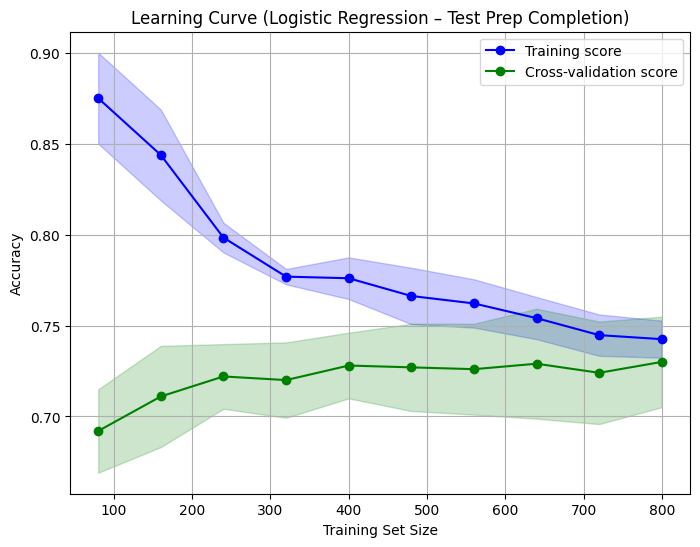

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation score")

# Shaded areas for variance
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="green")

plt.title("Learning Curve (Logistic Regression – Test Prep Completion)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# **Challenge**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (800, 14)
Testing set size: (200, 14)


In [ ]:
# Initialize Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train
rf_clf.fit(X_train, y_train)

# Evaluate accuracy
train_acc = accuracy_score(y_train, rf_clf.predict(X_train))
test_acc = accuracy_score(y_test, rf_clf.predict(X_test))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.6500


In [ ]:
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring="accuracy")

for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print("-" * 50)
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Fold 1: 0.6800
Fold 2: 0.6450
Fold 3: 0.7050
Fold 4: 0.6950
Fold 5: 0.6500
--------------------------------------------------
Mean CV accuracy: 0.6750
Standard deviation: 0.0239


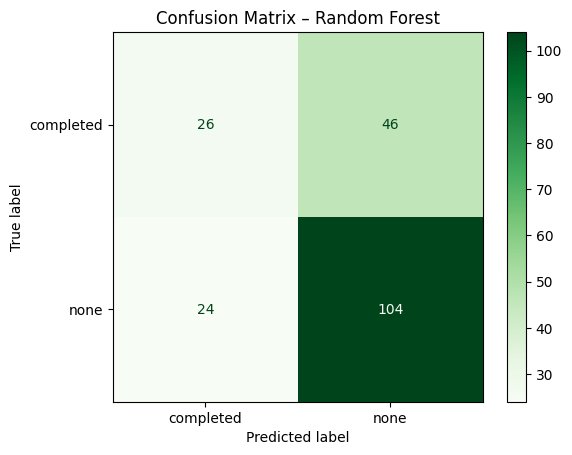

Accuracy: 0.6500
Precision: 0.5200
Recall: 0.3611
F1-score: 0.4262

Classification Report:
               precision    recall  f1-score   support

   completed     0.5200    0.3611    0.4262        72
        none     0.6933    0.8125    0.7482       128

    accuracy                         0.6500       200
   macro avg     0.6067    0.5868    0.5872       200
weighted avg     0.6309    0.6500    0.6323       200



In [ ]:
# Predictions
y_pred = rf_clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix – Random Forest")
plt.show()

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label="completed")
rec = recall_score(y_test, y_pred, pos_label="completed")
f1 = f1_score(y_test, y_pred, pos_label="completed")

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

print("-" * 50)

print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

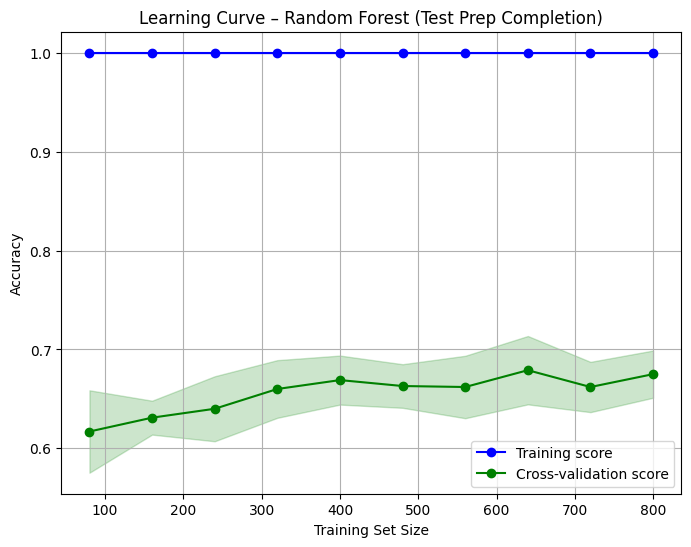

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_clf, X, y, cv=5, scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Mean & std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.2, color="green")

plt.title("Learning Curve – Random Forest (Test Prep Completion)")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# **Summary & Comparison**


---

In this challenged, I’ve used the Random Forest Classifier to compare it’s performance with the Logistic Regression. In the Logistic Regression Model, it had a performance output of 0.7142 accuracy score in the training accuracy and 0.7600 accuracy score in the testing accuracy. In contrast, the Random Forest Classifier has a training accuracy score of 1.0000 and testing accuracy score of 0.6500. The output performance indicate that the Logistic Regression performed better as the scores of the Random Forest Classifier resulted in overfitting as the gap between the scores of the test and training accuracy was too wide compared with the Logistic Regression.

In the Cross-Validation phase, the 5-Fold Cross Validation was applied. The Logistic Regression had a Mean CV accuracy score of 0.7300 and Standard deviation score of 0.0249. In the Random Forest Classifier, it had a Mean CV score of 0.6750 and a Standard deviation score of 0.0239. This implies that the Logistic Regression outperforms that Random Forest Classifier in terms of generalization as it has a higher percentage of accuracy. However, both models have a slight difference with the scores in the standard deviation with Logistic Regression having a slight higher score.

 If we compare the results of the confusion matrix, then it’s no doubt that the results of the Logistic Regression is far better. The model predicted 40 True Positives (TP), 32 False Negatives (FN), 16 False Positives (FP), and 112 True Negatives (TN). In contrast, the Random Forest Classifier results are 26 True Positives (TP), 46 False Negatives (FN), 24 False Positives (24), and 104 True Negatives (TN). Although both models have its flaws, in terms of accuracy of the models prediction, the Logistic Regression model performed better.

Lastly, we have the Learning Curve phase. In this phase, the Logistic Regression model also outperformed the Random Forest Classifier. The graph of the Logistic Regression indicates a small but consistent gap between the curves. This indicates that the model is not overfitting and not severely under fitting.

All in all, the model that performed better is the Logistic Regression. In terms of accuracy and prediction it is able to outperform the Random Forest Classifier.